# Выпускной проект

## Введение
Менеджеру отдела маркетинга банка необходима информация для маркетинговых кампаний и работы с менеджерами продуктов. Целью работы является максимально точно определить сегмент клиентов, подверженых уходу из банка. Необходимо выделить сегмент отточных клиентов, в котором они будут однородны, с высокой вероятностью оттока и покрывали максимальное количество проблемных зон банка.

Для достижения цели необходимо решить следующие задачи:
- провести исследовательский анализ;
- проверить минимум две гипотезы;
- сделать выводы о влиянии определенных признаков и их значений на отток клиентов;
- выделить сегменты и приоритизировать их;
- сделать общий вывод с рекомендациями;
- подготовить презентацию.

В качестве исходных данных имеется датасет с данными о клиентах банка "Метанпром" в городе Ярославле и областных городах: Ростов Великий и Рыбинск.

## Декомпозиция проекта
Для выполнения описанных задач и достижения поставленной цели, опишем основные шаги выполнения проекта:
1. Загрузка данных и изучение общей информации
2. Предобработка данных:
    - Поиск и анализ пропусков
    - Поиск и анализ дубликатов
    - Возможное добавление дополнительных полей
3. Исследование влияния признаков между собой и на показатель оттока (распределения, нормализованные распределения, корреляции, портреты клиентов)
4. Формулировка и проверка гипотез
    - Проверка гипотезы различия дохода между теми клиентами, которые ушли, и теми, которые остались
    - Формулировка и проверка дополнительных гипотезы
5. Промежуточные итоги
6. Выделение основных сегментов пользователей, подверженных оттоку
7. Общий вывод и рекомендации
8. Презентация со всеми ключевыми моментами, определенными в ходы выполнения описанных выше шагов.

Для начала работы загрузим сразу все необходимые библиотеки и модули.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

## Загрузка данных и изучение общей информации
Загрузим датасет в переменную data из csv-файла bank_scrooge.csv, находящийся по пути https://code.s3.yandex.net/datasets/, и посмотрим на общую информацию и выведем первые 5 строк.

In [2]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')
data.info()
display(data.head())

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 10000 entries, 0 to 9999

Data columns (total 12 columns):

 #   Column         Non-Null Count  Dtype  

---  ------         --------------  -----  

 0   USERID         10000 non-null  int64  

 1   score          10000 non-null  float64

 2   city           10000 non-null  object 

 3   gender         10000 non-null  object 

 4   age            9974 non-null   float64

 5   equity         10000 non-null  int64  

 6   balance        7705 non-null   float64

 7   products       10000 non-null  int64  

 8   credit_card    10000 non-null  int64  

 9   last_activity  10000 non-null  int64  

 10  EST_SALARY     10000 non-null  float64

 11  churn          10000 non-null  int64  

dtypes: float64(4), int64(6), object(2)

memory usage: 937.6+ KB


,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


Имеем 10000 строк и 12 колонок. Имена колонок совпадают с описанием датасета и означают:
- USERID - идентификатор пользователя,
- score - баллы кредитного скоринга,
- city - город,
- gender - пол,
- age - возраст,
- equity - количество баллов собственности,
- balance - баланс на счёте действующего клиента / баланс во время закрытия счета ушедшего клиента,
- products - количество продуктов, которыми пользуется клиент,
- credit_card - есть ли кредитная карта (1 - есть кредитная карта, 0 - нет карты),
- last_activity - активный клиент (1 - активный, 0 - неактивный),
- EST_SALARY - заработная плата клиента,
- churn - ушёл или нет.

## Предобработка данных
Приведем названия колонок к нижнему регистру.

In [3]:
data.columns = map(str.lower, data.columns)
data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 10000 entries, 0 to 9999

Data columns (total 12 columns):

 #   Column         Non-Null Count  Dtype  

---  ------         --------------  -----  

 0   userid         10000 non-null  int64  

 1   score          10000 non-null  float64

 2   city           10000 non-null  object 

 3   gender         10000 non-null  object 

 4   age            9974 non-null   float64

 5   equity         10000 non-null  int64  

 6   balance        7705 non-null   float64

 7   products       10000 non-null  int64  

 8   credit_card    10000 non-null  int64  

 9   last_activity  10000 non-null  int64  

 10  est_salary     10000 non-null  float64

 11  churn          10000 non-null  int64  

dtypes: float64(4), int64(6), object(2)

memory usage: 937.6+ KB


### Поиск и анализ пропусков
По общей информации наблюдаем пропуски в колонках с возрастом и балансом на счету. Посмотрим на строки, в которых пропущены данные по возрасту, и количество таких строк.

In [4]:
display(data[data['age'].isna()])

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1247,228075,932.0,Ярославль,М,NaN,5,7601719.20,2,1,1,408121.16,0
2165,187635,692.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,160368.82,0
2444,221156,913.0,Ярославль,М,NaN,0,NaN,1,1,1,135693.24,0
3091,138660,836.0,Ростов,Ж,NaN,5,294315.53,2,0,1,63310.22,1
4912,210674,834.0,Рыбинск,М,NaN,1,238330.52,2,0,1,93775.06,0
5470,218868,827.0,Рыбинск,Ж,NaN,4,448959.07,2,1,1,67835.95,0
5495,151662,884.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,137500.77,0
7236,210135,908.0,Рыбинск,Ж,NaN,4,1120340.31,3,1,1,85002.15,0
7248,219343,920.0,Рыбинск,Ж,NaN,0,NaN,1,1,0,159248.67,0
7345,184913,829.0,Ярославль,Ж,NaN,3,188648.77,2,0,1,75206.90,0


In [5]:
print('Количество строк с пропущенным возрастом:', data['age'].isna().sum())
print('Количество строк с пропущенным возрастом в процентах от общего числа строк:',
      data['age'].isna().sum() / data.shape[0] * 100, '%')

Количество строк с пропущенным возрастом: 26

Количество строк с пропущенным возрастом в процентах от общего числа строк: 0.26 %


Данные по возрасту достоверно заполнить не можем. Среди выведенных строк только одна принадлежит клиенту, который ушел. Вдобавок, данные строки составляют всего 0.26% от общих данных, что позволяет исключить их, незначительно теряя в количестве данных.

In [6]:
data = data.dropna(subset=['age'])
data.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 9974 entries, 0 to 9999

Data columns (total 12 columns):

 #   Column         Non-Null Count  Dtype  

---  ------         --------------  -----  

 0   userid         9974 non-null   int64  

 1   score          9974 non-null   float64

 2   city           9974 non-null   object 

 3   gender         9974 non-null   object 

 4   age            9974 non-null   float64

 5   equity         9974 non-null   int64  

 6   balance        7695 non-null   float64

 7   products       9974 non-null   int64  

 8   credit_card    9974 non-null   int64  

 9   last_activity  9974 non-null   int64  

 10  est_salary     9974 non-null   float64

 11  churn          9974 non-null   int64  

dtypes: float64(4), int64(6), object(2)

memory usage: 1013.0+ KB


Посчитаем количество строк с пропущенными балансами.

In [7]:
print('Количество строк с пропущенным балансом:', data['balance'].isna().sum())
print('Количество строк с пропущенным балансом в процентах от общего числа строк:',
      round(data['balance'].isna().sum() / data.shape[0] * 100, 2), '%')

Количество строк с пропущенным балансом: 2279

Количество строк с пропущенным балансом в процентах от общего числа строк: 22.85 %


Достоверно заполнить пропуски не можем, а исключить нельзя, так как количество пропущенных строк составляет 22.85% от общего числа строк, что является существенной долей. Оставляем данные пропуски как есть.

На этом поиск и анализ пропусков завершен.

### Поиск и анализ дубликатов
Посчитаем явные дубликаты по всем столбцам

In [8]:
print('Количество явных дубликатов:', data.duplicated().sum())

Количество явных дубликатов: 0


Проверим столбец userid. По логике, идентификаторы должны быть индивидуальными и не должны совпадать.

In [9]:
print('Количество дубликатов в столбце userid:', data.duplicated(subset=['userid']).sum())

Количество дубликатов в столбце userid: 50


Посомотрим на данные строки:

In [10]:
duplicated_userid = data[data.duplicated(subset=['userid'])]['userid']
display(data[data['userid'].isin(duplicated_userid)].sort_values(by='userid').head(15))

#display(data[data.duplicated(subset=['userid'])].sort_values(by='userid'))

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883.0,Рыбинск,Ж,55.0,1,362756.49,3,0,1,175920.48,1
7694,116540,887.0,Ярославль,Ж,38.0,0,NaN,1,0,1,119247.61,0
4866,117943,855.0,Рыбинск,Ж,32.0,6,1036832.93,4,1,1,107792.71,1
7542,117943,880.0,Ярославль,Ж,40.0,0,NaN,1,1,0,137718.93,0
5863,120258,908.0,Рыбинск,Ж,38.0,4,2213581.63,2,0,1,160327.77,1
5896,120258,905.0,Ярославль,М,30.0,0,NaN,1,1,1,146427.96,0
1411,123461,829.0,Ярославль,Ж,59.0,0,96222.44,2,0,1,102771.55,1
8638,123461,934.0,Рыбинск,М,34.0,0,NaN,2,1,0,291619.27,0
9775,124450,758.0,Рыбинск,Ж,36.0,0,73574.07,2,0,1,79963.59,0
8164,124450,859.0,Ярославль,Ж,38.0,6,516811.20,1,1,1,95144.63,1


Видим, что строки с дублированными userid принадлежат разным клиентам. Как видно из первых строк, это произошло из-за того, что userid присваивался клиетам, не учитывая уже присвоенные идентификаторы в других городах. Оставляем данные дубликаты как есть.

Проверим неявные дубликаты в единственнмо столбце, где они могли остаться - в столбце с городами. Посмотрим уникальные значения этого столбца.

In [11]:
print(data['city'].unique())

['Рыбинск' 'Ярославль' 'Ростов']


Явных и неявных дубликатов не обнаружено. На этом поиск и анализ дубликатов завершен.

### Приведение столбцов к нужным типам данных
Среди имеющихся столбцов почти везде тип данных подходит для исследования. В столбце со скорингом в выборке наблюдаются целые числа, но это не означает, что среди них нет вещественных. А вот в столбце с возрастом по идее должны быть целые (даже натуральные) числа, поэтому для оптимизации использования памяти приведем его к типу данных int, хоть датасет в принципе не занимает особо много места.

In [12]:
data['age'] = data['age'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 9974 entries, 0 to 9999

Data columns (total 12 columns):

 #   Column         Non-Null Count  Dtype  

---  ------         --------------  -----  

 0   userid         9974 non-null   int64  

 1   score          9974 non-null   float64

 2   city           9974 non-null   object 

 3   gender         9974 non-null   object 

 4   age            9974 non-null   int64  

 5   equity         9974 non-null   int64  

 6   balance        7695 non-null   float64

 7   products       9974 non-null   int64  

 8   credit_card    9974 non-null   int64  

 9   last_activity  9974 non-null   int64  

 10  est_salary     9974 non-null   float64

 11  churn          9974 non-null   int64  

dtypes: float64(3), int64(7), object(2)

memory usage: 1013.0+ KB


**Промежуточый вывод**

Произведен поиск и анализ пропусков, явных и неявных дубликатов, исключено 26 строк из 10000, столбцы приведены к нужному типу данных. Предобработка данных завершена.

## Исследовательский анализ
Для начала посмотрим на соотношение действующих и ушедших клиентов, затем по порядку и посмотрим взаимосвязь между столбцами и показателем ухода. Так как показатель ухода клиента - это качественный показатель, будем сначала смотреть на распределения и нормализованные распределения.


,churn,count
0,0,8155
1,1,1819


Процент ушедших от общего числа клиентов: 18.24 %


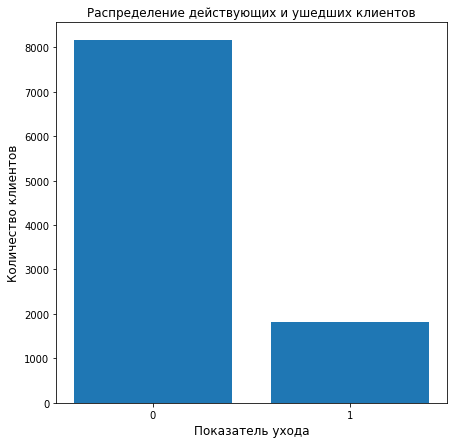

In [13]:
# Строим сводную таблицу
churn_rate = data.pivot_table(
    index='churn', values='userid', aggfunc='count').sort_values(by='churn', ascending=True).reset_index()
churn_rate.columns = ['churn', 'count']
display(churn_rate)

print('Процент ушедших от общего числа клиентов:',
     round(churn_rate.loc[1, 'count'] / churn_rate['count'].sum() * 100, 2), '%')

# Строим график
plt.figure(figsize=(7, 7))
plt.bar(churn_rate['churn'], churn_rate['count'])
plt.title('Распределение действующих и ушедших клиентов', size=12)
plt.xlabel('Показатель ухода', size=12)
plt.ylabel('Количество клиентов', size=12)
plt.xticks(churn_rate['churn'])
plt.show()

18.24 % - довольно существенная часть клиентов. При выделении сегментов, данное число будет ориентиром.

### Показатель скоринга
Построим распределение и нормализованные распределение по баллам скоринга.

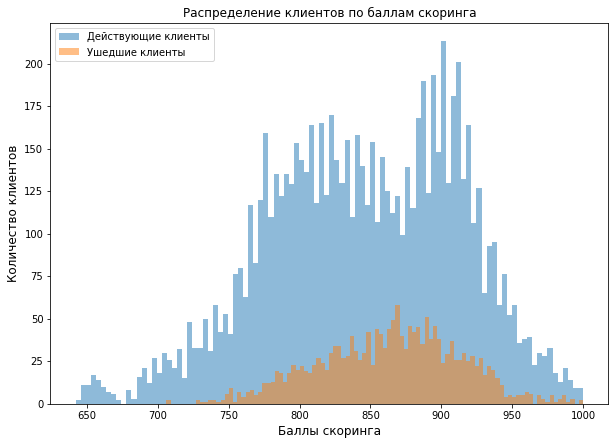

In [14]:
plt.figure(figsize=(10, 7))
plt.hist(data[data['churn']==0]['score'], bins=100, alpha=0.5, label='Действующие клиенты')
plt.hist(data[data['churn']==1]['score'], bins=100, alpha=0.5, label='Ушедшие клиенты')
plt.title('Распределение клиентов по баллам скоринга', size=12)
plt.xlabel('Баллы скоринга', size=12)
plt.ylabel('Количество клиентов', size=12)
plt.legend(loc='upper left')
plt.show()

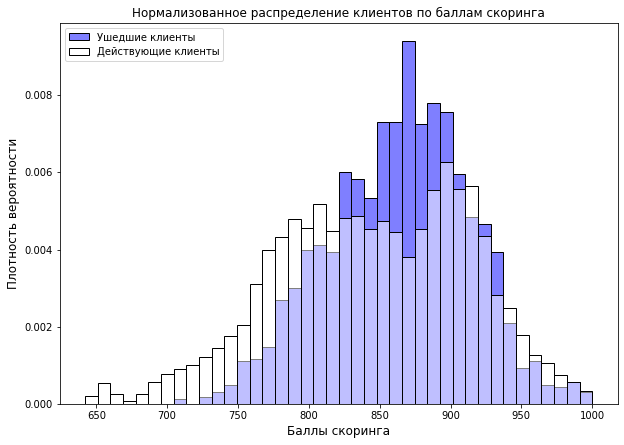

In [15]:
plt.figure(figsize=(10, 7))
sns.histplot(data=data, hue='churn', x='score', stat='density', common_norm=False, palette='flag')
plt.title('Нормализованное распределение клиентов по баллам скоринга', size=12)
plt.xlabel('Баллы скоринга', size=12)
plt.ylabel('Плотность вероятности', size=12)
plt.legend(loc='upper left', labels=['Ушедшие клиенты', 'Действующие клиенты'])
plt.show()

Наблюдаем, что по баллам скоринга имеется диапазон примерно от 820 до 900 баллов, где плотность вероятности оттока клиентов больше, чем у действующих. Выделим этих клиентов и посмотрим отток в процентах.

In [16]:
# Строим сводную таблицу
segment_churn_rate = data[(data['score']>=820) & (data['score']<=900)].pivot_table(
    index='churn', values='userid', aggfunc='count').sort_values(by='churn', ascending=True).reset_index()
segment_churn_rate.columns = ['churn', 'count']
display(segment_churn_rate)

print('Процент ушедших от общего числа клиентов в сегменте:',
     round(segment_churn_rate.loc[1, 'count'] / segment_churn_rate['count'].sum() * 100, 2), '%')

,churn,count
0,0,3168
1,1,1035


Процент ушедших от общего числа клиентов в сегменте: 24.63 %


В выделенном сегменте почти четверть клиентов ушла, а среди оставшихся - чуть более 3000 человек.

### Города
Построим распределение и нормализованные распределение по городам.

,city,stay,churn,all,%_churns_to_all
0,Ростов,1151,265,1416,18.71
1,Рыбинск,2246,437,2683,16.29
2,Ярославль,4758,1117,5875,19.01


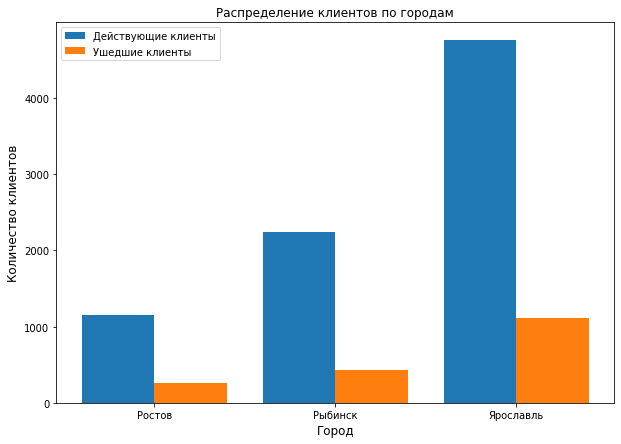

In [17]:
# Строим сводную таблицу
churn_cities = data.pivot_table(
    index='city', columns='churn', values='userid', aggfunc='count').reset_index()
churn_cities.columns = ['city', 'stay', 'churn']
churn_cities['all'] = churn_cities['stay'] + churn_cities['churn']
churn_cities = churn_cities.sort_values(by='all', ascending=True)
churn_cities['%_churns_to_all'] = round(churn_cities['churn'] / churn_cities['all'] * 100, 2)
display(churn_cities)

x_axis = np.arange(len(churn_cities['city']))
plt.figure(figsize=(10, 7))
plt.bar(x_axis-0.2, churn_cities['stay'], width=0.4, label = 'Действующие клиенты')
plt.bar(x_axis+0.2, churn_cities['churn'], width=0.4, label = 'Ушедшие клиенты')
plt.xticks(x_axis, churn_cities['city'])
plt.title('Распределение клиентов по городам', size=12)
plt.xlabel('Город', size=12)
plt.ylabel('Количество клиентов', size=12)
plt.legend(loc='upper left')
plt.show()

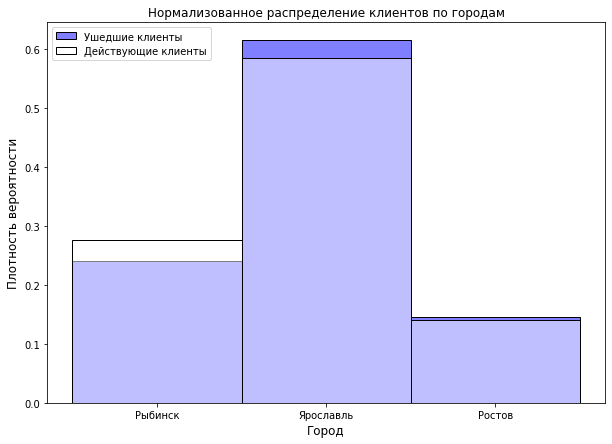

In [18]:
plt.figure(figsize=(10, 7))
sns.histplot(data=data, hue='churn', x='city', stat='density', common_norm=False, palette='flag')
plt.title('Нормализованное распределение клиентов по городам', size=12)
plt.xlabel('Город', size=12)
plt.ylabel('Плотность вероятности', size=12)
plt.legend(loc='upper left', labels=['Ушедшие клиенты', 'Действующие клиенты'])
plt.show()

Процент оттока в Ярославле и Ростове немного больше, чем ориентир в 18.24%. Запомним это и используем при исследовании пересечений сегментов.

### Пол клиента
Построим распределение и нормализованные распределение по полу клиентов.

,gender,stay,churn,all,%_churns_to_all
0,Ж,4347,636,4983,12.76
1,М,3808,1183,4991,23.70


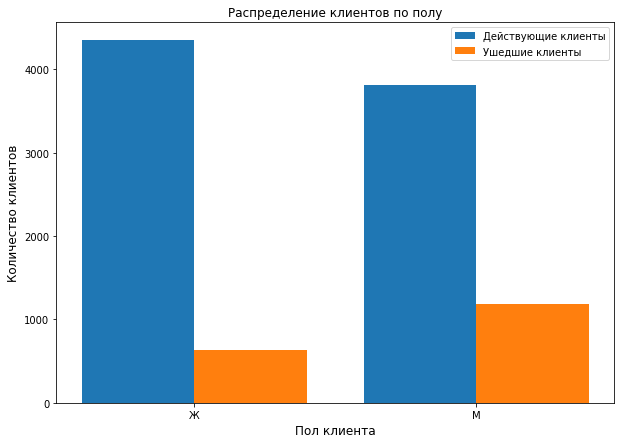

In [19]:
# Строим сводную таблицу
churn_gender = data.pivot_table(
    index='gender', columns='churn', values='userid', aggfunc='count').reset_index()
churn_gender.columns = ['gender', 'stay', 'churn']
churn_gender['all'] = churn_gender['stay'] + churn_gender['churn']
churn_gender = churn_gender.sort_values(by='all', ascending=True)
churn_gender['%_churns_to_all'] = round(churn_gender['churn'] / churn_gender['all'] * 100, 2)
display(churn_gender)

x_axis = np.arange(len(churn_gender['gender']))
plt.figure(figsize=(10, 7))
plt.bar(x_axis-0.2, churn_gender['stay'], width=0.4, label = 'Действующие клиенты')
plt.bar(x_axis+0.2, churn_gender['churn'], width=0.4, label = 'Ушедшие клиенты')
plt.xticks(x_axis, churn_gender['gender'])
plt.title('Распределение клиентов по полу', size=12)
plt.xlabel('Пол клиента', size=12)
plt.ylabel('Количество клиентов', size=12)
plt.legend(loc='upper right')
plt.show()

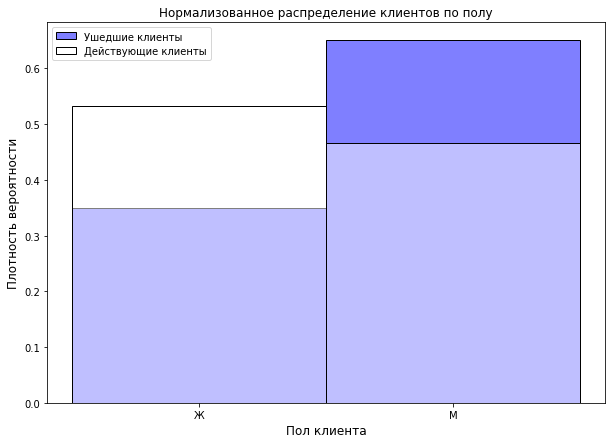

In [20]:
plt.figure(figsize=(10, 7))
sns.histplot(data=data, hue='churn', x='gender', stat='density', common_norm=False, palette='flag')
plt.title('Нормализованное распределение клиентов по полу', size=12)
plt.xlabel('Пол клиента', size=12)
plt.ylabel('Плотность вероятности', size=12)
plt.legend(loc='upper left', labels=['Ушедшие клиенты', 'Действующие клиенты'])
plt.show()

Количество мужчин и женщин среди клиентов примерно одинаковое, а плотность верояности ухода у мужчин значительно выше. В процентном соотношении ушедших пользователей к общему числу клиентов, процент ухода мужчин выше ориентира в 18.24 %.

### Возраст клиента
Построим распределение и нормализованные распределение по возрасту.

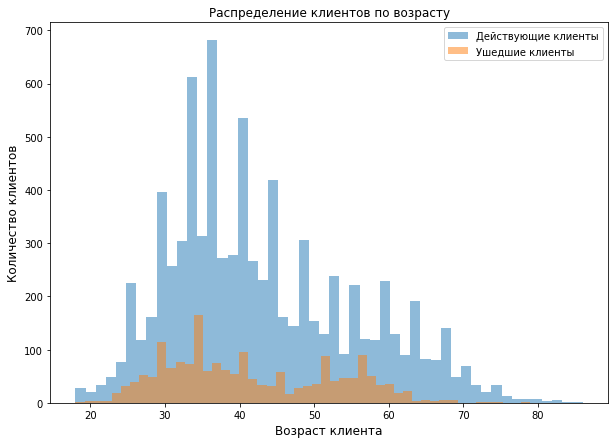

In [21]:
plt.figure(figsize=(10, 7))
plt.hist(data[data['churn']==0]['age'], bins=50, alpha=0.5, label='Действующие клиенты')
plt.hist(data[data['churn']==1]['age'], bins=50, alpha=0.5, label='Ушедшие клиенты')
plt.title('Распределение клиентов по возрасту', size=12)
plt.xlabel('Возраст клиента', size=12)
plt.ylabel('Количество клиентов', size=12)
plt.legend(loc='upper right')
plt.show()

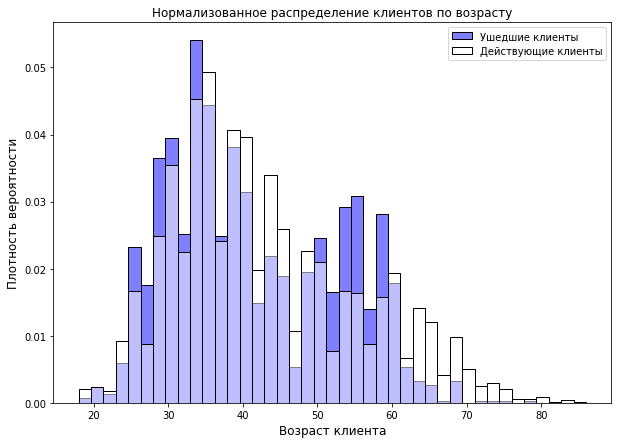

In [22]:
plt.figure(figsize=(10, 7))
sns.histplot(data=data, hue='churn', x='age', stat='density', common_norm=False, palette='flag')
plt.title('Нормализованное распределение клиентов по возрасту', size=12)
plt.xlabel('Возраст клиента', size=12)
plt.ylabel('Плотность вероятности', size=12)
plt.legend(loc='upper right', labels=['Ушедшие клиенты', 'Действующие клиенты'])
plt.show()

По возрасту клиентов можно выделить группы, где плотность вероятности оттока выше - это примерно с 25 до 35, и с 50 до 60 лет. Выделим этих клиентов и посмотрим отток в процентах.

In [23]:
# Строим сводную таблицу
segment_churn_age = data[((data['age']>=25) & (data['age']<=35)) | ((data['age']>=50) & (data['age']<=60))].pivot_table(
    index='churn', values='userid', aggfunc='count').sort_values(by='churn', ascending=True).reset_index()
segment_churn_age.columns = ['churn', 'count']
display(segment_churn_age)

print('Процент ушедших от общего числа клиентов в сегменте:',
     round(segment_churn_age.loc[1, 'count'] / segment_churn_age['count'].sum() * 100, 2), '%')

,churn,count
0,0,3690
1,1,1133


Процент ушедших от общего числа клиентов в сегменте: 23.49 %


### Баллы собственности клиента
Построим распределение и нормализованные распределение по баллам собственности.

,equity,stay,churn,all,%_churns_to_all
0,0,2486,90,2576,3.49
1,1,680,93,773,12.03
2,2,885,166,1051,15.79
3,3,1219,322,1541,20.90
4,4,1383,464,1847,25.12
5,5,1339,576,1915,30.08
6,6,103,58,161,36.02
7,7,43,37,80,46.25
8,8,11,6,17,35.29
9,9,6,7,13,53.85


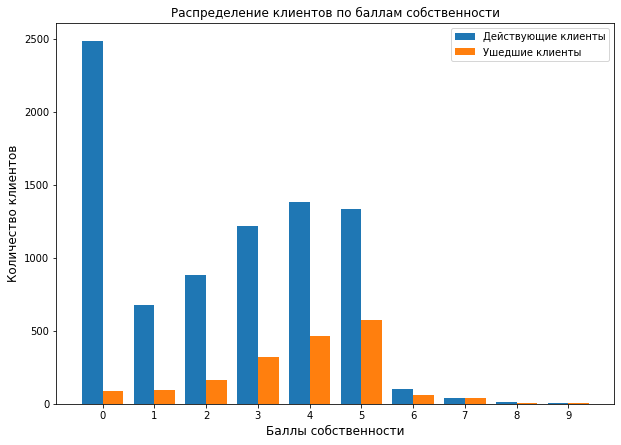

In [24]:
# Строим сводную таблицу
churn_equity = data.pivot_table(
    index='equity', columns='churn', values='userid', aggfunc='count').sort_values(by='equity', ascending=True).reset_index()
churn_equity.columns = ['equity', 'stay', 'churn']
churn_equity['all'] = churn_equity['stay'] + churn_equity['churn']
#churn_equity = churn_equity.sort_values(by='all', ascending=True)
churn_equity['%_churns_to_all'] = round(churn_equity['churn'] / churn_equity['all'] * 100, 2)
display(churn_equity)

x_axis = np.arange(len(churn_equity['equity']))
plt.figure(figsize=(10, 7))
plt.bar(x_axis-0.2, churn_equity['stay'], width=0.4, label = 'Действующие клиенты')
plt.bar(x_axis+0.2, churn_equity['churn'], width=0.4, label = 'Ушедшие клиенты')
plt.xticks(x_axis, churn_equity['equity'])
plt.title('Распределение клиентов по баллам собственности', size=12)
plt.xlabel('Баллы собственности', size=12)
plt.ylabel('Количество клиентов', size=12)
plt.legend(loc='upper right')
plt.show()

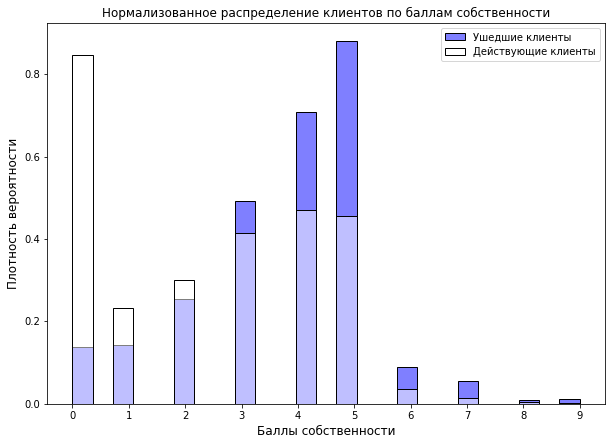

In [25]:
plt.figure(figsize=(10, 7))
sns.histplot(data=data, hue='churn', x='equity', stat='density', common_norm=False, palette='flag')
plt.title('Нормализованное распределение клиентов по баллам собственности', size=12)
plt.xticks(x_axis, churn_equity['equity'])
plt.xlabel('Баллы собственности', size=12)
plt.ylabel('Плотность вероятности', size=12)
plt.legend(loc='upper right', labels=['Ушедшие клиенты', 'Действующие клиенты'])
plt.show()

Начиная с 3 баллов и до 9 видно, плотность вероятности оттока преобладает. Выделим этих клиентов и посмотрим отток в процентах.

In [26]:
# Строим сводную таблицу
segment_churn_equity = data[data['equity']>=3].pivot_table(
    index='churn', values='userid', aggfunc='count').sort_values(by='churn', ascending=True).reset_index()
segment_churn_equity.columns = ['churn', 'count']
display(segment_churn_equity)

print('Процент ушедших от общего числа клиентов в сегменте:',
     round(segment_churn_equity.loc[1, 'count'] / segment_churn_equity['count'].sum() * 100, 2), '%')

,churn,count
0,0,4104
1,1,1470


Процент ушедших от общего числа клиентов в сегменте: 26.37 %


В выделенном сегменте более четверти клиентов ушли.

### Баланс на счете
Построим распределение и нормализованные распределение по балансу на счете.

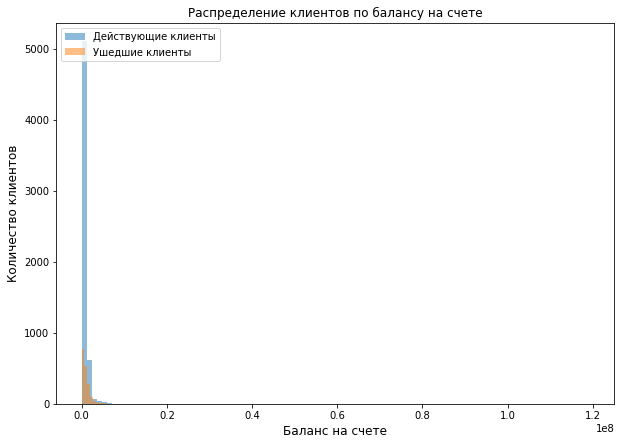

In [27]:
plt.figure(figsize=(10, 7))
plt.hist(data[data['churn']==0]['balance'], bins=100, alpha=0.5, label='Действующие клиенты')
plt.hist(data[data['churn']==1]['balance'], bins=100, alpha=0.5, label='Ушедшие клиенты')
plt.title('Распределение клиентов по балансу на счете', size=12)
plt.xlabel('Баланс на счете', size=12)
plt.ylabel('Количество клиентов', size=12)
plt.legend(loc='upper left')
plt.show()

Имеются счета, на которых есть, или были очень большие суммы. Посмотрим на график ближе, от 0 до 6 млн.

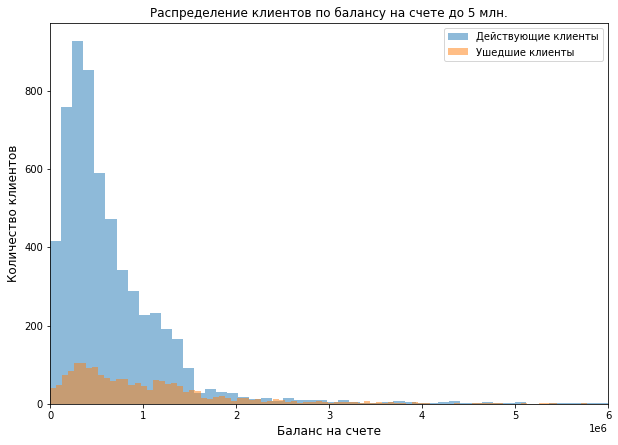

In [28]:
plt.figure(figsize=(10, 7))
plt.hist(data[data['churn']==0]['balance'], bins=1000, alpha=0.5, label='Действующие клиенты')
plt.hist(data[data['churn']==1]['balance'], bins=1000, alpha=0.5, label='Ушедшие клиенты')
plt.title('Распределение клиентов по балансу на счете до 5 млн.', size=12)
plt.xlim([0, 6000000])
plt.xlabel('Баланс на счете', size=12)
plt.ylabel('Количество клиентов', size=12)
plt.legend(loc='upper right')
plt.show()

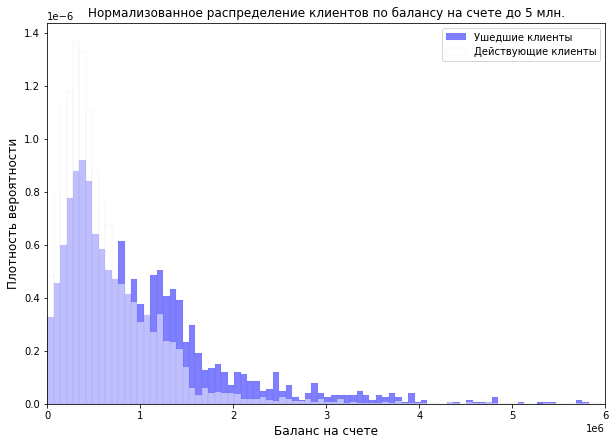

In [29]:
plt.figure(figsize=(10, 7))

sns.histplot(data=data, hue='churn', x='balance', stat='density', common_norm=False, palette='flag',)
plt.title('Нормализованное распределение клиентов по балансу на счете до 5 млн.', size=12)
plt.xlim([0, 6*10**6])
plt.xlabel('Баланс на счете', size=12)
plt.ylabel('Плотность вероятности', size=12)
plt.legend(loc='upper right', labels=['Ушедшие клиенты', 'Действующие клиенты'])
#ax = plt.axes()
#ax.set_facecolor((0.5, 0.5, 0.5))
plt.show()

Где-то начиная с 700 тыс. наблюдается преобладание плотности вероятности оттока. Посчитаем, сколько клиентов с балансом на счете более 6 млн.

In [30]:
print('Количество клиентов с балансом на счете более 6 млн.:',
      data[data['balance']>6*10**6]['balance'].count())

print('Процент клиентов с балансом на счете более 6 млн.:',
      round(data[data['balance']>6*10**6]['balance'].count() / data.shape[0] * 100, 2), '%')

Количество клиентов с балансом на счете более 6 млн.: 49

Процент клиентов с балансом на счете более 6 млн.: 0.49 %


Если примем границы от 700 тыс до 6 млн., то пожертвуем 0.49 % данных. Выделим этих клиентов и посмотрим отток в процентах.

In [31]:
# Строим сводную таблицу
segment_churn_equity = data[(data['balance']>=0.7*10**6) & (data['balance']<=6*10**6)].pivot_table(
    index='churn', values='userid', aggfunc='count').sort_values(by='churn', ascending=True).reset_index()
segment_churn_equity.columns = ['churn', 'count']
display(segment_churn_equity)

print('Процент ушедших от общего числа клиентов в сегменте:',
     round(segment_churn_equity.loc[1, 'count'] / segment_churn_equity['count'].sum() * 100, 2), '%')

,churn,count
0,0,1882
1,1,966


Процент ушедших от общего числа клиентов в сегменте: 33.92 %


В выделеном сегменте почти треть ушла.

### Количество продуктов
Построим распределение и нормализованные распределение по количеству продуктов, которым пользуется клиент.

,products,stay,churn,all,%_churns_to_all
0,0,NaN,1.0,NaN,NaN
1,1,3088.0,235.0,3323.0,7.07
2,2,4141.0,978.0,5119.0,19.11
3,3,741.0,297.0,1038.0,28.61
4,4,174.0,300.0,474.0,63.29
5,5,11.0,8.0,19.0,42.11


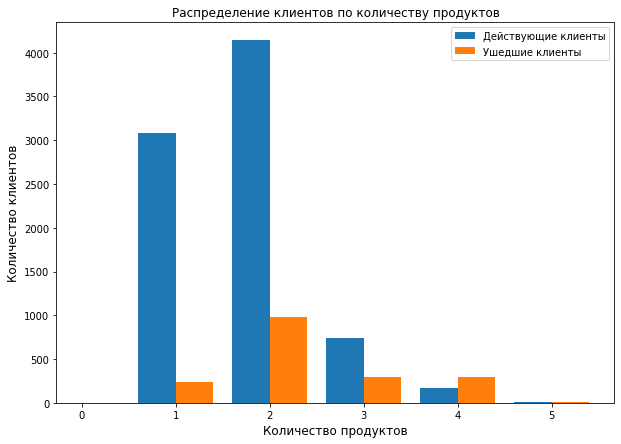

In [32]:
# Строим сводную таблицу
churn_products = (
    data.pivot_table(index='products', columns='churn', values='userid', aggfunc='count')
    .sort_values(by='products', ascending=True)
    .reset_index()
)

churn_products.columns = ['products', 'stay', 'churn']
churn_products['all'] = churn_products['stay'] + churn_products['churn']
churn_products['%_churns_to_all'] = round(churn_products['churn'] / churn_products['all'] * 100, 2)
display(churn_products)

x_axis = np.arange(len(churn_products['products']))
plt.figure(figsize=(10, 7))
plt.bar(x_axis-0.2, churn_products['stay'], width=0.4, label = 'Действующие клиенты')
plt.bar(x_axis+0.2, churn_products['churn'], width=0.4, label = 'Ушедшие клиенты')
plt.xticks(x_axis, churn_products['products'])
plt.title('Распределение клиентов по количеству продуктов', size=12)
plt.xlabel('Количество продуктов', size=12)
plt.ylabel('Количество клиентов', size=12)
plt.legend(loc='upper right')
plt.show()

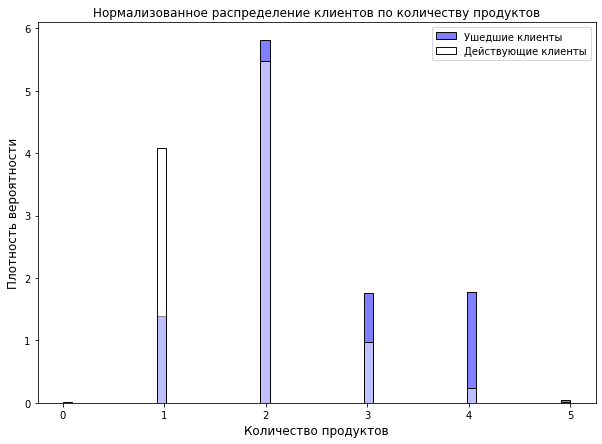

In [33]:
plt.figure(figsize=(10, 7))
sns.histplot(data=data, hue='churn', x='products', stat='density', common_norm=False, palette='flag')
plt.title('Нормализованное распределение клиентов по количеству продуктов', size=12)
plt.xlabel('Количество продуктов', size=12)
plt.ylabel('Плотность вероятности', size=12)
plt.legend(loc='upper right', labels=['Ушедшие клиенты', 'Действующие клиенты'])
plt.show()

Начиная с 2 продуктов до 5 плотность вероятности оттока преобладает. Выделим этих клиентов и посмотрим отток в процентах.

In [34]:
# Строим сводную таблицу
segment_churn_products = data[data['products']>=2].pivot_table(
    index='churn', values='userid', aggfunc='count').sort_values(by='churn', ascending=True).reset_index()
segment_churn_products.columns = ['churn', 'count']
display(segment_churn_products)

print('Процент ушедших от общего числа клиентов в сегменте:',
     round(segment_churn_products.loc[1, 'count'] / segment_churn_products['count'].sum() * 100, 2), '%')

,churn,count
0,0,5067
1,1,1583


Процент ушедших от общего числа клиентов в сегменте: 23.8 %


В выделенном сегменте более четверти клиентов ушли.

### Наличие кредитной карты
Построим распределение и нормализованные распределение по наличию кредитной карты.

,credit_card,stay,churn,all,%_churns_to_all
0,0,2374,816,3190,25.58
1,1,5781,1003,6784,14.78


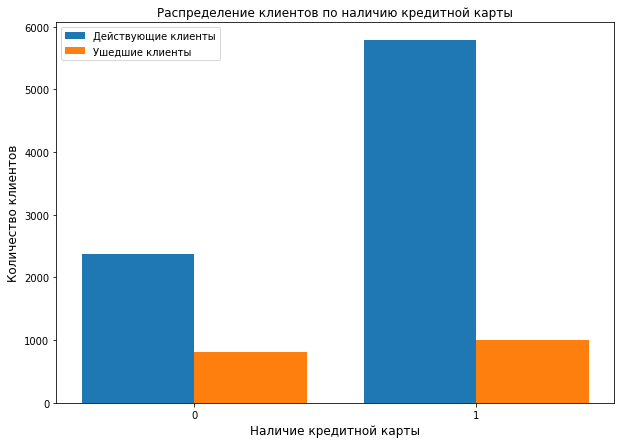

In [35]:
# Строим сводную таблицу
churn_credit_card = data.pivot_table(
    index='credit_card', columns='churn', values='userid', aggfunc='count').reset_index()
churn_credit_card.columns = ['credit_card', 'stay', 'churn']
churn_credit_card['all'] = churn_credit_card['stay'] + churn_credit_card['churn']
churn_credit_card = churn_credit_card.sort_values(by='all', ascending=True)
churn_credit_card['%_churns_to_all'] = round(churn_credit_card['churn'] / churn_credit_card['all'] * 100, 2)
display(churn_credit_card)

x_axis = np.arange(len(churn_credit_card['credit_card']))
plt.figure(figsize=(10, 7))
plt.bar(x_axis-0.2, churn_credit_card['stay'], width=0.4, label = 'Действующие клиенты')
plt.bar(x_axis+0.2, churn_credit_card['churn'], width=0.4, label = 'Ушедшие клиенты')
plt.xticks(x_axis, churn_credit_card['credit_card'])
plt.title('Распределение клиентов по наличию кредитной карты', size=12)
plt.xlabel('Наличие кредитной карты', size=12)
plt.ylabel('Количество клиентов', size=12)
plt.legend(loc='upper left')
plt.show()

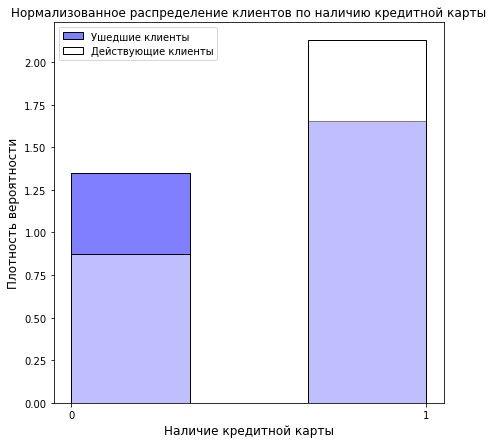

In [36]:
plt.figure(figsize=(7, 7))
sns.histplot(data=data, hue='churn', x='credit_card', stat='density', common_norm=False, palette='flag', bins=3)
plt.title('Нормализованное распределение клиентов по наличию кредитной карты', size=12)
plt.xlabel('Наличие кредитной карты', size=12)
plt.ylabel('Плотность вероятности', size=12)
plt.legend(loc='upper left', labels=['Ушедшие клиенты', 'Действующие клиенты'])
plt.xticks(x_axis, churn_credit_card['credit_card'])
plt.show()

У клиентов без кредитной карты больше плотность вероятности уйти. По имеющимся данным, из них ушла четверть.

### Активность
Построим распределение и нормализованные распределение по активности клиента.

,last_activity,stay,churn,all,%_churns_to_all
0,0,4217,542,4759,11.39
1,1,3938,1277,5215,24.49


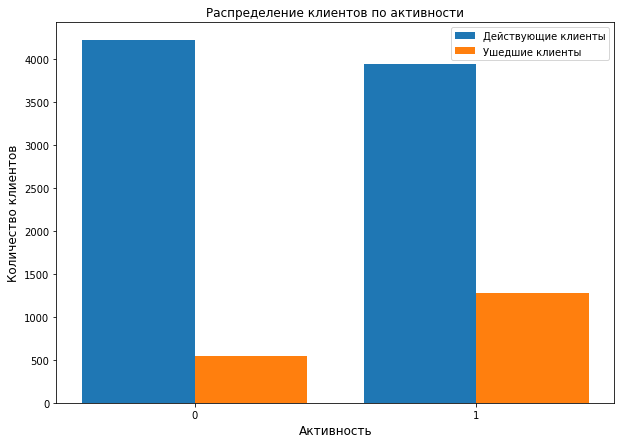

In [37]:
# Строим сводную таблицу
churn_last_activity = data.pivot_table(
    index='last_activity', columns='churn', values='userid', aggfunc='count').reset_index()
churn_last_activity.columns = ['last_activity', 'stay', 'churn']
churn_last_activity['all'] = churn_last_activity['stay'] + churn_last_activity['churn']
churn_last_activity = churn_last_activity.sort_values(by='all', ascending=True)
churn_last_activity['%_churns_to_all'] = round(churn_last_activity['churn'] / churn_last_activity['all'] * 100, 2)
display(churn_last_activity)

x_axis = np.arange(len(churn_last_activity['last_activity']))
plt.figure(figsize=(10, 7))
plt.bar(x_axis-0.2, churn_last_activity['stay'], width=0.4, label = 'Действующие клиенты')
plt.bar(x_axis+0.2, churn_last_activity['churn'], width=0.4, label = 'Ушедшие клиенты')
plt.xticks(x_axis, churn_last_activity['last_activity'])
plt.title('Распределение клиентов по активности', size=12)
plt.xlabel('Активность', size=12)
plt.ylabel('Количество клиентов', size=12)
plt.legend(loc='upper right')
plt.show()

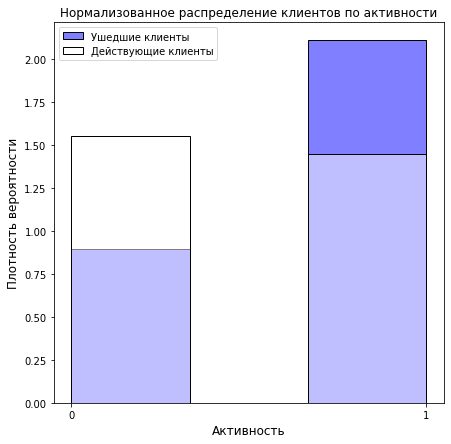

In [38]:
plt.figure(figsize=(7, 7))
sns.histplot(data=data, hue='churn', x='last_activity', stat='density', common_norm=False, palette='flag', bins=3)
plt.title('Нормализованное распределение клиентов по активности', size=12)
plt.xlabel('Активность', size=12)
plt.ylabel('Плотность вероятности', size=12)
plt.legend(loc='upper left', labels=['Ушедшие клиенты', 'Действующие клиенты'])
plt.xticks(x_axis, churn_last_activity['last_activity'])
plt.show()

У активных клиентов больше плотность вероятности уйти. По имеющимся данным, из них ушла почти четверть.

### Заработная плата
Построим распределение и нормализованные распределение по заработной плате клиента.

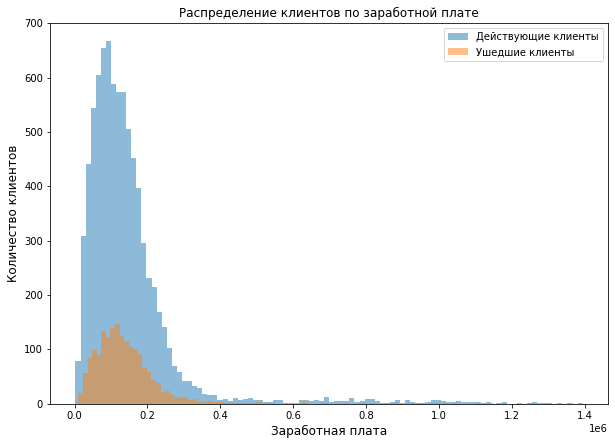

In [39]:
plt.figure(figsize=(10, 7))
plt.hist(data[data['churn']==0]['est_salary'], bins=100, alpha=0.5, label='Действующие клиенты')
plt.hist(data[data['churn']==1]['est_salary'], bins=100, alpha=0.5, label='Ушедшие клиенты')
plt.title('Распределение клиентов по заработной плате', size=12)
plt.xlabel('Заработная плата', size=12)
plt.ylabel('Количество клиентов', size=12)
plt.legend(loc='upper right')
plt.show()

Аналогично, как и при исследовании баланса на счету, имеется небольшое количество клиентов с высокими доходами. Рассмотрим диапазон до 600 тыс.

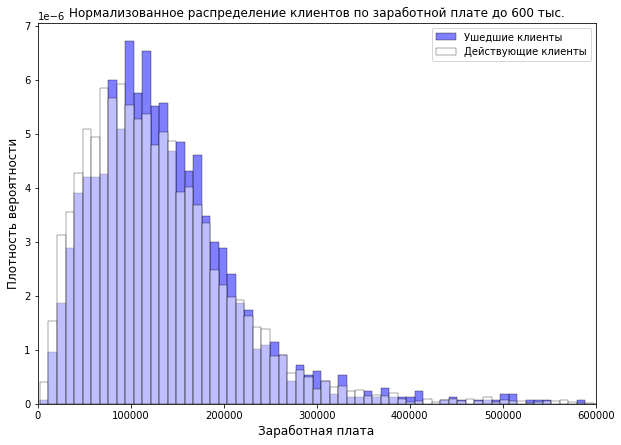

In [47]:
plt.figure(figsize=(10, 7))

sns.histplot(data=data, hue='churn', x='est_salary', stat='density', common_norm=False, palette='flag',)
plt.title('Нормализованное распределение клиентов по заработной плате до 600 тыс.', size=12)
plt.xlim([0, 0.6*10**6])
plt.xlabel('Заработная плата', size=12)
plt.ylabel('Плотность вероятности', size=12)
plt.legend(loc='upper right', labels=['Ушедшие клиенты', 'Действующие клиенты'])
plt.show()

Можно выделить примерный диапазон от 100 тыс. до 210 тыс. где преобладает плотность вероятности оттока. Выделим этих клиентов и посмотрим отток в процентах.

In [41]:
# Строим сводную таблицу
segment_churn_est_salary = data[(data['est_salary']>=0.1*10**6) & (data['est_salary']<=0.21*10**6)].pivot_table(
    index='churn', values='userid', aggfunc='count').sort_values(by='churn', ascending=True).reset_index()
segment_churn_est_salary.columns = ['churn', 'count']
display(segment_churn_est_salary)

print('Процент ушедших от общего числа клиентов в сегменте:',
     round(segment_churn_est_salary.loc[1, 'count'] / segment_churn_est_salary['count'].sum() * 100, 2), '%')

,churn,count
0,0,3592
1,1,925


Процент ушедших от общего числа клиентов в сегменте: 20.48 %


Процент оттока в выделенном сегменте выше, чем ориентир в 18.24%.

##  Формулировка и проверка гипотез
### Различие доходов
Проверим гипотезу различия дохода между теми клиентами, которые ушли, и теми, которые остались. Для проверки гипотезы предлагается использовать t-тест проверки равенства средних двух независимых выборок, для которого необходимо учесть несколько требований:
- генеральные совокупности не зависят друг от друга,
- выборочные средние нормально распределены,
- дисперсии рассматриваемых генеральных совокупностей равны.

Предполагая, что каждая строка датасета принадлежит отдельному клиенту, и клиенты не взаимодействуют друг с другом, можно считать, что генеральные совокупности не зависят друг от друга. 

При исследовании взаимосвязи между зарплатой и показателем оттока была построена гистограмма распределения ушедших и оставшихся клиентов, на которой видно, что распределние похоже на нормальное, сдвинутое влево, что явлется хорошим (но необязательным) поводом применить t-тест. Так как количество данных в ушедшим и оставшимся клиентам исчисляютя тысячами строк, этого достаточно, чтобы по центральной предельной теореме заключить, что выборочные средние распределены нормально.

С одной стороны, мы не можем сказать, дисперсии генеральных совокупностей равны или нет, но при проведении t-теста есть параметр equal_var, который по умолчанию принимает значение True, что позволяет нивелировать различные дисперсии.

То есть можно сказать, что условия для проведения t-теста соблюдены.

За нулевую гипотезу примем - различий нет, за альтернтаивную - различия есть. Уровень статистической значимости примем 0.05.

In [42]:
# уровень статистической значимости
alpha = 0.05

results = st.ttest_ind(data[data['churn']==1]['est_salary'], data[data['churn']==0]['est_salary'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.8647861589211189

Не получилось отвергнуть нулевую гипотезу


То есть доходы ушедших клиентов от доходов оставшихся статистически с большой вероятностью не отличаются.

### Различие балансов на счетах
Проверим гипотезу различия балансов на счетах между теми клиентами, которые ушли, и теми, которые остались.

Аналогично предыдущему пункту, предлагается использовать t-тест. Так как используется тот же датасет, можем считать, что генеральные совокупности не влияют друг на друга, а количество клиентов также исчисляется тысячами (хоть и поменьше) и, как следствие, выборочные средние распределены нормально. Распределение самих значений самих выборок видно при исследовании взаимосвязи между балансом на счете и показателем оттока, где была построена гистограмма распределения ушедших и оставшихся клиентов. По гистограмме можно увидеть похожее на нормальное распределение, сильно съехавшее влево.

За нулевую гипотезу примем - различий нет, за альтернтаивную - различия есть. Уровень статистической значимости также примем 0.05.

In [43]:
# уровень статистической значимости
alpha = 0.05

results = st.ttest_ind(data[(data['churn']==1) & ~(data['balance'].isna())]['balance'], 
                       data[(data['churn']==0) & ~(data['balance'].isna())]['balance'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 4.3764190272075795e-14

Отвергаем нулевую гипотезу


Не учитывая пустые балансы, доходы ушедших клиентов от доходов оставшихся статистически с большой вероятностью отличаются.

## Выделение сегментов и приоритизация.
Посмотрев взаимосвязь между параметрами и показателем оттока, имеем следующую картину:
- по имеющимся данным всего ушло 1819 клиентов, что составляет 18.24 % всех рассматриваемых клиентов. Это число будем считать ориентиром;
- по показателю скоринга удалось выделить сегмент от 820 до 900 баллов, где процент ушедших клиентов составил 24.63 %;
- по городам наибольший отток наблюдается в Ярославле и Ростове - 19.01 % и 18.71 % соответственно:
- процент оттока у мужчин почти вдвое выше, чем у женщин и составляет 23.70 %
- по возрасту удалось выделить сегмент от 25 до 35 и от 50 до 60 лет, где процент ушедших клиентов составил 23.49 %;
- по баллам собственности клиенты, у которых от 3 баллов и больше, ушли в 26.37 % случаев;
- по балансу на счете удалось выделить сегмент от 700 тыс. до 6 млн., где ушло 33.92 % клиентов. Гипотеза о различии по балансу между ушедшими и оставшимися клиентами проверена, статистически вероятность различия высока. Однако, стоит отметить, что в данном столбце отсутствуют значения для 22.85 % строк, что делает данный сегмент не совсем корректным для применения;
- клиенты, пользующиеся хотя бы 2 продуктами, уходили в 23.80 % случаев;
- клиенты без кредитной карты уходили в 25.58 % случаев;
- активные клиенты уходили в 24.49 % случаев;
- по заработной плате удалось выделить сегмент от 100 до 210 тыс., где ушло 20.48 % клиентов. Гипотеза о различии доходов между ушедшими и оставшимися клиентами проверена, статистически вероятность различия низкая.

Совершение активных действий и отсутствие кредитной карты (это для ориентира. Удерживать клиента, препятствуя его активности или пытаясь оформить для него кредитную карту, выглядит решением не из лучших).

### Сегмент 1
Из перечисленных сегментов можно оставить те, где процент оттока наиболее большой, а именно: по баллам скоринга от 820 до 900 баллов, по возрасту от 25 до 35 лет и от 50 до 60 лет, по баллам собственности от 3 баллов и больше.

Попробуем выделить клиентов, которые одновременно входили бы в перечисленные сегменты.

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3,225363,866.0,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1
5,202305,856.0,Рыбинск,М,56,4,863687.24,3,1,0,156619.80,0
12,132970,845.0,Ярославль,Ж,31,3,591928.52,2,1,1,112697.16,1
13,166357,837.0,Рыбинск,Ж,28,4,302249.22,2,0,1,30950.94,0
22,161656,871.0,Ярославль,М,51,4,708866.92,1,1,0,106407.26,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9972,150126,834.0,Ростов,М,27,4,192776.27,2,0,1,26570.39,0
9986,152986,822.0,Ярославль,М,58,5,1434857.91,2,0,1,83442.41,1
9988,158678,889.0,Ярославль,М,35,4,880534.89,4,1,1,126564.61,0
9990,162357,822.0,Ярославль,М,31,3,646575.17,1,1,1,88297.63,0


,churn,count
0,0,895
1,1,539


Процент ушедших от общего числа клиентов: 37.59 %


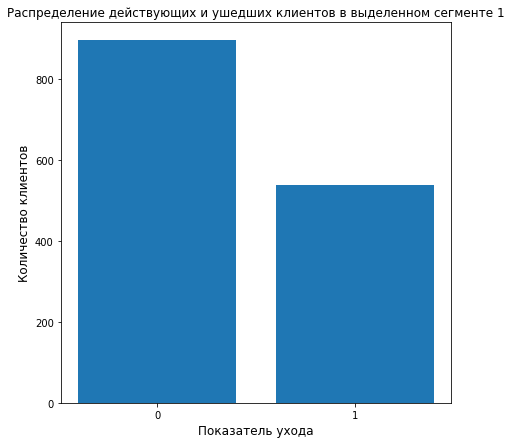

In [44]:
final_segment_data = data.query('820 <= score <= 900')
final_segment_data = final_segment_data.query('25 <= age <= 35 or 50 <= age <= 60')
final_segment_data = final_segment_data.query('equity >= 3')

display(final_segment_data)

# Строим сводную таблицу
final_churn_rate = final_segment_data.pivot_table(
    index='churn', values='userid', aggfunc='count').sort_values(by='churn', ascending=True).reset_index()
final_churn_rate.columns = ['churn', 'count']
display(final_churn_rate)

print('Процент ушедших от общего числа клиентов:',
     round(final_churn_rate.loc[1, 'count'] / final_churn_rate['count'].sum() * 100, 2), '%')

# Строим график
plt.figure(figsize=(7, 7))
plt.bar(final_churn_rate['churn'], final_churn_rate['count'])
plt.title('Распределение действующих и ушедших клиентов в выделенном сегменте 1', size=12)
plt.xlabel('Показатель ухода', size=12)
plt.ylabel('Количество клиентов', size=12)
plt.xticks(final_churn_rate['churn'])
plt.show()

Получился сегмент, где показатель оттока составляет 37.59 %, 539 ушедших и 895 оставшихся клиентов.

### Сегмент 2
Попробуем выделить еще один сегмент, в котором будут мужчины из Ярославля с баллами собственности от 3 и выше.

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
4,157978,730.0,Ярославль,М,34,5,174.00,1,1,0,67353.16,1
8,211686,923.0,Ярославль,М,54,5,1206337.87,2,1,0,155371.79,0
14,172138,815.0,Ярославль,М,35,5,547499.87,2,1,1,105883.26,0
16,123335,829.0,Ярославль,М,45,5,507842.84,1,1,1,169330.64,0
17,214277,793.0,Ярославль,М,53,3,627034.50,2,1,0,183430.19,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9983,179959,762.0,Ярославль,М,46,3,286775.87,2,1,1,124931.69,0
9986,152986,822.0,Ярославль,М,58,5,1434857.91,2,0,1,83442.41,1
9988,158678,889.0,Ярославль,М,35,4,880534.89,4,1,1,126564.61,0
9990,162357,822.0,Ярославль,М,31,3,646575.17,1,1,1,88297.63,0


,churn,count
0,0,1283
1,1,729


Процент ушедших от общего числа клиентов: 36.23 %


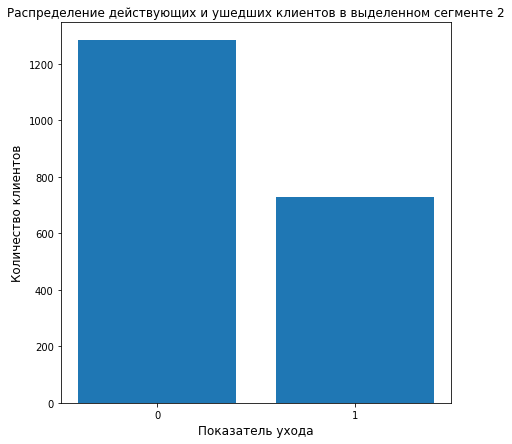

In [45]:
final_segment_data2 = data.query('gender == "М" ')
final_segment_data2 = final_segment_data2.query('city == "Ярославль" or city == "Ростов" ')
final_segment_data2 = final_segment_data2.query('equity >= 3')
display(final_segment_data2)

# Строим сводную таблицу
final_churn_rate2 = final_segment_data2.pivot_table(
    index='churn', values='userid', aggfunc='count').sort_values(by='churn', ascending=True).reset_index()
final_churn_rate2.columns = ['churn', 'count']
display(final_churn_rate2)

print('Процент ушедших от общего числа клиентов:',
     round(final_churn_rate2.loc[1, 'count'] / final_churn_rate2['count'].sum() * 100, 2), '%')

# Строим график
plt.figure(figsize=(7, 7))
plt.bar(final_churn_rate2['churn'], final_churn_rate2['count'])
plt.title('Распределение действующих и ушедших клиентов в выделенном сегменте 2', size=12)
plt.xlabel('Показатель ухода', size=12)
plt.ylabel('Количество клиентов', size=12)
plt.xticks(final_churn_rate2['churn'])
plt.show()

Получился сегмент, где показатель оттока составляет 36.23 %, 729 ушедших и 1283 оставшихся клиентов.

### Сегмент 3
Попробуем выделить еще сегмент, ориентируясь только на качество клиента, взяв в расчет на этот раз активность.
В выборку должны попасть активные клиенты по баллам скоринга от 820 до 900 баллов, по баллам собственности от 3 баллов и более, по количеству используемых продуктов от 2 и более.

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
4,157978,730.0,Ярославль,М,34,5,174.00,1,1,0,67353.16,1
8,211686,923.0,Ярославль,М,54,5,1206337.87,2,1,0,155371.79,0
14,172138,815.0,Ярославль,М,35,5,547499.87,2,1,1,105883.26,0
16,123335,829.0,Ярославль,М,45,5,507842.84,1,1,1,169330.64,0
17,214277,793.0,Ярославль,М,53,3,627034.50,2,1,0,183430.19,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9983,179959,762.0,Ярославль,М,46,3,286775.87,2,1,1,124931.69,0
9986,152986,822.0,Ярославль,М,58,5,1434857.91,2,0,1,83442.41,1
9988,158678,889.0,Ярославль,М,35,4,880534.89,4,1,1,126564.61,0
9990,162357,822.0,Ярославль,М,31,3,646575.17,1,1,1,88297.63,0


,churn,count
0,0,685
1,1,590


Процент ушедших от общего числа клиентов: 46.27 %


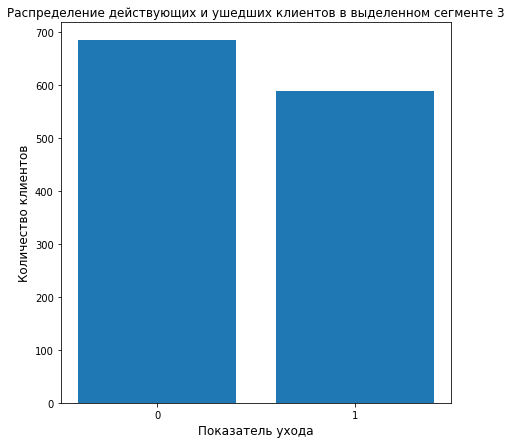

In [46]:
final_segment_data3 = data.query('820 <= score <= 900')
final_segment_data3 = final_segment_data3.query('equity >= 3')
final_segment_data3 = final_segment_data3.query('products >= 2')
final_segment_data3 = final_segment_data3.query('last_activity == 1')

display(final_segment_data3)

# Строим сводную таблицу
final_churn_rate3 = final_segment_data3.pivot_table(
    index='churn', values='userid', aggfunc='count').sort_values(by='churn', ascending=True).reset_index()
final_churn_rate3.columns = ['churn', 'count']
display(final_churn_rate3)

print('Процент ушедших от общего числа клиентов:',
     round(final_churn_rate3.loc[1, 'count'] / final_churn_rate3['count'].sum() * 100, 2), '%')

# Строим график
plt.figure(figsize=(7, 7))
plt.bar(final_churn_rate3['churn'], final_churn_rate3['count'])
plt.title('Распределение действующих и ушедших клиентов в выделенном сегменте 3', size=12)
plt.xlabel('Показатель ухода', size=12)
plt.ylabel('Количество клиентов', size=12)
plt.xticks(final_churn_rate2['churn'])
plt.show()

Получился сегмент, где показатель оттока составляет 46.27 %, 590 ушедших и 685 оставшихся клиентов.

## Общий вывод и рекомендации
В ходе выполнения работы были:
- получены и изучены данные о 10000 клиентов, 
- проведена предобработка данных, в ходе которых остались данные о 9974 клиентов, 
- проведено исследование влияния параметров клиентов на показатель оттока,
- проверены гипотезы,
- сформулированы критерии, по которым можно определять сегменты, подверженные оттоку,
- выделены сегменты, объединяющие в себе несколько критериев.

В результате получены три сегмента:
- сегмент 1, где по баллам скоринга от 820 до 900 баллов, по возрасту от 25 до 35 лет и от 50 до 60 лет, по баллам собственности от 3 баллов и больше. В данном сегменте процент оттока составляет 37.59 %, 539 ушедших и 895 оставшихся клиентов;
- сегмент 2, куда выбраны мужчины из Ярославля с баллами собственности от 3 и выше. В данном сегменте составляет 36.23 %, 729 ушедших и 1283 оставшихся клиентов;
- сегмент 3, выбраны активные клиенты по баллам скоринга от 820 до 900 баллов, по баллам собственности от 3 баллов и более, по количеству используемых продуктов от 2 и более. В данном сегменте составляет 46.27 %, 590 ушедших и 685 оставшихся клиентов.

Также большой процент оттока у клиентов, у которых отсутствует кредитная карта (25.58 %). Кроме этого, был выделен сегмент по балансу на счете (33.92 % оттока), но так как данные по балансу на счете неполные (отсутствует 22.85 % значений), то данный сегмент не является корректным для использования.

Рекомендуется обратить внимание на оставшихся в получившемся сегменте клиентов. Кроме того, при сборе данных рекомендуется минимизировать пропуски в данных для более корректного и полного анализа.

## Презентация

Ссылка на презентацию:
https://disk.yandex.ru/i/813Hzp8F_4xO9g